Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
data = boston.data

In [8]:
feature_names = boston.feature_names

In [12]:
X = pd.DataFrame(data, columns=feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
target = boston.target

In [13]:
y = pd.DataFrame(target, columns=["price"])
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train_scaler = scaler.fit_transform(X_train)
X_train_scaler

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [33]:
X_test_scaler = scaler.fit_transform(X_test)
X_test_scaler

array([[-0.47678706, -0.44018634, -1.14921855, ..., -1.33894103,
         0.41308415, -0.60871618],
       [-0.48154797,  1.2289217 , -0.79642905, ..., -0.78082095,
         0.42860582, -1.3730385 ],
       [-0.47490641, -0.44018634,  2.39213032, ...,  0.61447927,
         0.3533257 ,  0.64388464],
       ...,
       [ 1.40372123, -0.44018634,  0.95107489, ...,  0.67029128,
        -3.58319267,  1.08083841],
       [-0.48216228, -0.44018634, -1.08344424, ..., -0.27851287,
         0.41851673, -0.07882303],
       [-0.47633711, -0.44018634,  0.16327799, ..., -0.16688885,
         0.27704776, -0.62258773]])

In [34]:
from sklearn.manifold import TSNE

In [36]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

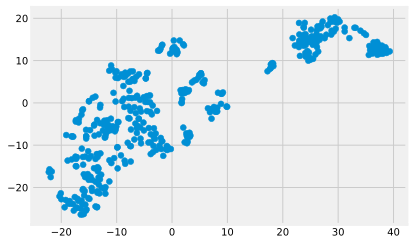

In [39]:
X_train_tsne = tsne.fit_transform(X_train_scaler)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaler)

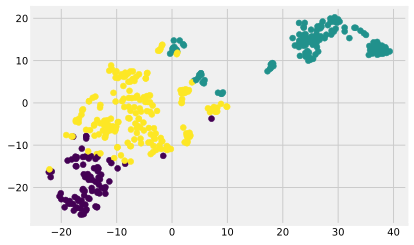

In [46]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [48]:
y_train[labels_train == 0].mean()

price    27.788372
dtype: float64

In [49]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [50]:
y_train[labels_train == 2].mean()

price    24.958115
dtype: float64

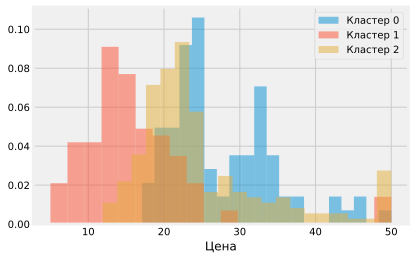

In [52]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


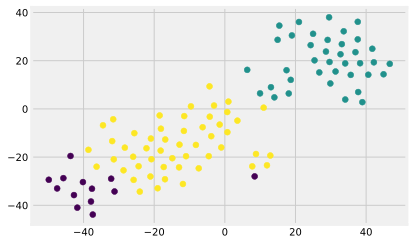

In [57]:
X_test_tsne = tsne.fit_transform(X_test_scaler)
labels_test = kmeans.fit_predict(X_test_scaler)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [59]:
y_test[labels_test == 0].mean()

price    34.553846
dtype: float64

In [61]:
y_test[labels_test == 1].mean()

price    16.710526
dtype: float64

In [62]:
y_test[labels_test == 2].mean()

price    21.717647
dtype: float64